## 📌 Modelo com representação 2D da praia

Este código implementa as seguintes equações:  
1. **Fluxo de sedimentos baseado na inclinação:**  
   $$
   Q_sx = -\alpha \frac{\partial h}{\partial x}, \quad Q_sy = -\alpha \frac{\partial h}{\partial y}
   $$
2. **Conservação de massa dos sedimentos:**  
   $$
   \frac{\partial h}{\partial t} = -\left(\frac{\partial Q_sx}{\partial x} + \frac{\partial Q_sy}{\partial y}\right) + D \nabla^2 h
   $$
3. **Termo de difusão:**  
   $$
   D \nabla^2 h = D \left( \frac{\partial^2 h}{\partial x^2} + \frac{\partial^2 h}{\partial y^2} \right)
   $$


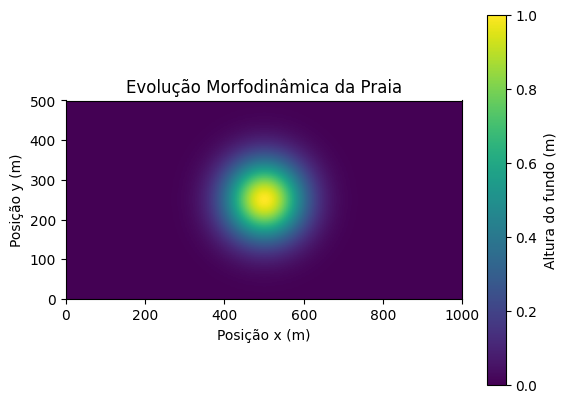

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parâmetros do modelo
Lx, Ly = 1000, 500  # Extensão da praia (m) em x e y
Nx, Ny = 200, 100  # Número de pontos espaciais em x e y
dx, dy = Lx / Nx, Ly / Ny  # Espaçamento espacial
dt = 1  # Passo de tempo (s)
T = 500  # Tempo total da simulação (s)
D = 0.1  # Coeficiente de difusão (m^2/s)

# Inicialização das variáveis
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
h = np.exp(-((X - Lx/2) / 100) ** 2 - ((Y - Ly/2) / 100) ** 2)  # Perfil inicial gaussiano
Q_sx = np.zeros((Ny, Nx))  # Fluxo de sedimentos em x
Q_sy = np.zeros((Ny, Nx))  # Fluxo de sedimentos em y

# Função para calcular fluxo de sedimentos baseado na inclinação
def compute_sediment_flux(h, dx, dy):
    # Calcula o fluxo de sedimentos nas direções x e y:
    # Q_sx = -\alpha \frac{\partial h}{\partial x}, \quad Q_sy = -\alpha \frac{\partial h}{\partial y}
    slope_x = np.gradient(h, axis=1) / dx
    slope_y = np.gradient(h, axis=0) / dy
    return -slope_x, -slope_y

# Função para atualizar a topografia
def update_topography(h, Q_sx, Q_sy, dx, dy, dt, D):
    # Atualiza a topografia com a equação da conservação de massa dos sedimentos em 2D:
    # \frac{\partial h}{\partial t} = -\nabla \cdot \vec{Q_s} + D \nabla^2 h
    dQ_sx_dx = np.gradient(Q_sx, axis=1) / dx
    dQ_sy_dy = np.gradient(Q_sy, axis=0) / dy
    
    dh_dt = -(dQ_sx_dx + dQ_sy_dy)  # Variação da altura
    h += dh_dt * dt  # Atualização da topografia
    
    # Termo difusivo
    h += D * (np.gradient(np.gradient(h, axis=1), axis=1) / dx**2 +
              np.gradient(np.gradient(h, axis=0), axis=0) / dy**2) * dt
    
    return h

# Configuração da animação
fig, ax = plt.subplots()
cmap = ax.imshow(h, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(cmap, label='Altura do fundo (m)')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Evolução Morfodinâmica da Praia')

def animate(frame):
    global h, Q_sx, Q_sy
    Q_sx, Q_sy = compute_sediment_flux(h, dx, dy)  # Cálculo do fluxo de sedimentos
    h = update_topography(h, Q_sx, Q_sy, dx, dy, dt, D)  # Atualização da topografia
    cmap.set_data(h)
    return cmap,

# Criando animação da evolução da praia ao longo do tempo
ani = FuncAnimation(fig, animate, frames=T, interval=50)
plt.show()


## Modelo com elementos topográficos

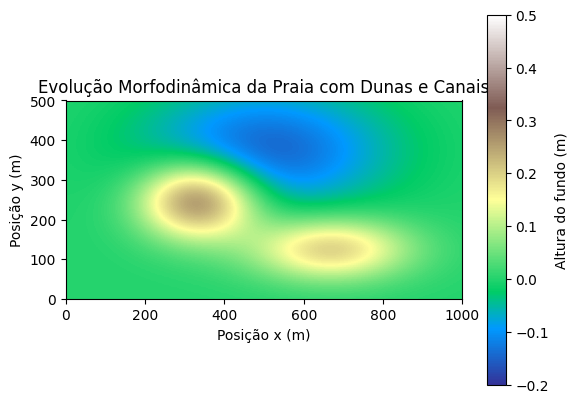

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parâmetros do modelo
Lx, Ly = 1000, 500  # Extensão da praia (m) em x e y
Nx, Ny = 200, 100  # Número de pontos espaciais em x e y
dx, dy = Lx / Nx, Ly / Ny  # Espaçamento espacial
dt = 1  # Passo de tempo (s)
T = 500  # Tempo total da simulação (s)
D = 0.1  # Coeficiente de difusão (m^2/s)
alpha = 0.01  # Coeficiente de transporte de sedimentos

# Inicialização das variáveis
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Adicionando elementos topográficos: dunas e canais
h = 0.3 * np.exp(-((X - Lx/3) / 150) ** 2 - ((Y - Ly/2) / 100) ** 2)  # Duna central
h += 0.2 * np.exp(-((X - 2*Lx/3) / 200) ** 2 - ((Y - Ly/4) / 80) ** 2)  # Outra duna
h -= 0.15 * np.exp(-((X - Lx/2) / 300) ** 2 - ((Y - 3*Ly/4) / 150) ** 2)  # Canal

Q_sx = np.zeros((Ny, Nx))  # Fluxo de sedimentos em x
Q_sy = np.zeros((Ny, Nx))  # Fluxo de sedimentos em y

# Função para calcular fluxo de sedimentos baseado na inclinação
def compute_sediment_flux(h, dx, dy, alpha):
    # Calcula o fluxo de sedimentos nas direções x e y:
    # Q_sx = -\alpha \frac{\partial h}{\partial x}, \quad Q_sy = -\alpha \frac{\partial h}{\partial y}
    slope_x = np.gradient(h, axis=1) / dx
    slope_y = np.gradient(h, axis=0) / dy
    return -alpha * slope_x, -alpha * slope_y

# Função para atualizar a topografia
def update_topography(h, Q_sx, Q_sy, dx, dy, dt, D):
    # Atualiza a topografia com a equação da conservação de massa dos sedimentos em 2D:
    # \frac{\partial h}{\partial t} = -\nabla \cdot \vec{Q_s} + D \nabla^2 h
    dQ_sx_dx = np.gradient(Q_sx, axis=1) / dx
    dQ_sy_dy = np.gradient(Q_sy, axis=0) / dy
    
    dh_dt = -(dQ_sx_dx + dQ_sy_dy)  # Variação da altura
    h += dh_dt * dt  # Atualização da topografia
    
    # Termo difusivo
    h += D * (np.gradient(np.gradient(h, axis=1), axis=1) / dx**2 +
              np.gradient(np.gradient(h, axis=0), axis=0) / dy**2) * dt
    
    return h

# Configuração da animação
fig, ax = plt.subplots()
cmap = ax.imshow(h, extent=[0, Lx, 0, Ly], origin='lower', cmap='terrain', vmin=-0.2, vmax=0.5)
plt.colorbar(cmap, label='Altura do fundo (m)')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Evolução Morfodinâmica da Praia com Dunas e Canais')

def animate(frame):
    global h, Q_sx, Q_sy
    Q_sx, Q_sy = compute_sediment_flux(h, dx, dy, alpha)  # Cálculo do fluxo de sedimentos
    h = update_topography(h, Q_sx, Q_sy, dx, dy, dt, D)  # Atualização da topografia
    cmap.set_data(h)
    return cmap,

# Criando animação da evolução da praia ao longo do tempo
ani = FuncAnimation(fig, animate, frames=T, interval=50)
plt.show()